In [1]:
import numpy as np
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn  


##  **Загружаем Данные**

In [2]:
url = "https://raw.githubusercontent.com/kustuk1306/ML-lab/main/diamonds_data.csv"
data_raw = pd.read_csv(url)
data_new = data_raw.iloc[:, 0:11]
data_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Мы видим, что столбцы (признаки) имеют имена

- carat - Значение карат бриллианта
- cut - Тип обрезки бриллианта (определяет блеск)
- color - Цвет бриллианта (в диапазоне от I1 - худший, IF - лучший)
- clarity - Тип брилианта в каратах (в диапазоне от J - худший, D - лучший) 
- depth - Значение глубины бриллианта
- table - Ширина вершины ромба относительно самого широкого конца
- price - Цена бриллианта
- x - Длина в мм
- y - Ширина в мм
- z - Глубина в мм

Столбцы 'cut' , 'color' и 'clarity' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [3]:
data_new['cut'] = data_new['cut'].astype('category')
data_new['color'] = data_new['color'].astype('category')
data_new['clarity'] = data_new['clarity'].astype('category')

In [4]:
data_new.loc[:, ['cut', 'color', 'clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


## Боремся с выбросами (outliers)

In [5]:
data_new['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      402.00
0.010      429.00
0.050      544.00
0.100      646.00
0.500     2401.00
0.900     9821.00
0.950    13107.10
0.990    17378.22
0.995    18093.66
Name: price, dtype: float64

Мы видим, например, что $99.9\%$ всех значений признака 'price' находится в диапазоне от $400$ до $18100$ (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [6]:
data_new['carat'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.23
0.010    0.24
0.050    0.30
0.100    0.31
0.500    0.70
0.900    1.51
0.950    1.70
0.990    2.18
0.995    2.31
Name: carat, dtype: float64

Мы видим, например, что $99.9\%$ всех значений признака 'carat' находится в диапазоне от $0.23$ до $2.31$ (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно).

Удалим все строки таблицы, в которых 'price' или 'carat' выходят за пределы квантилей $0.005$, $0.995$.

In [7]:
rows_to_drop = data_new[
    (data_new['price'] < data_new['price'].quantile(0.005)) | (data_new['price'] > data_new['price'].quantile(0.995)) | 
    (data_new['carat']  < data_new['carat' ].quantile(0.005)) | (data_new['carat']  > data_new['carat' ].quantile(0.995))].index
data = data_new.drop(rows_to_drop)
data.shape

(53184, 10)

## Визуальная и описательная статистика

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000
mean,0.786504,61.748451,57.451384,3830.148466,5.713838,5.717375,3.528204
std,0.451083,1.427690,2.231588,3802.382623,1.092347,1.114457,0.687762
min,0.230000,43.000000,43.000000,402.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000
max,2.310000,79.000000,95.000000,18077.000000,8.800000,58.900000,31.800000


Проанализиров строку count можно убедиться, что в наших данных нет пропусков.

Получим информацию о категориальных признаках:

In [9]:
data_describe = data.describe(include=['category'])
data_describe

,cut,color,clarity
count,53184,53184,53184
unique,5,7,8
top,Ideal,G,SI1
freq,21336,11177,12893


Можно вычислить матрицу корреляции для количественных признаков:

In [10]:
corr_mat = data.corr()
corr_mat

,carat,depth,table,price,x,y,z
carat,1.000000,0.025708,0.186148,0.921690,0.977600,0.952838,0.955494
depth,0.025708,1.000000,-0.294586,-0.011206,-0.027578,-0.031530,0.095194
table,0.186148,-0.294586,1.000000,0.128906,0.198465,0.186267,0.152947
price,0.921690,-0.011206,0.128906,1.000000,0.882608,0.862390,0.859634
x,0.977600,-0.027578,0.198465,0.882608,1.000000,0.973053,0.970138
y,0.952838,-0.031530,0.186267,0.862390,0.973053,1.000000,0.950168
z,0.955494,0.095194,0.152947,0.859634,0.970138,0.950168,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

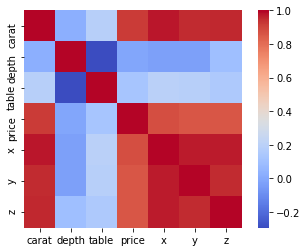

In [11]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Можно отметить зависимость между глубиной, высотой и шириной, а так же между ценой, числом карат и всеми тремя измерениями. Так же чем больше глубина алмаза, тем меньше будет размер его большей части.

Посмотрим сколько раз номинальные переменные принимают то или иное значение

In [12]:
data['cut'].value_counts()

Ideal        21336
Premium      13568
Very Good    11892
Good          4819
Fair          1569
Name: cut, dtype: int64

In [13]:
data['color'].value_counts()

G    11177
E     9725
F     9457
H     8152
D     6735
I     5281
J     2657
Name: color, dtype: int64

In [14]:
data['clarity'].value_counts()

SI1     12893
VS2     12108
SI2      8935
VS1      8080
VVS2     5050
VVS1     3647
IF       1777
I1        694
Name: clarity, dtype: int64

## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [15]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cut', 'color', 'clarity']


К небинарными признакам применим метод векторизации, который заключается в следующем.
Например, в нашей задаче признак cut принимает 5 различных значений:

In [16]:
data['cut'].unique()

['Very Good', 'Good', 'Ideal', 'Premium', 'Fair']
Categories (5, object): ['Very Good', 'Good', 'Ideal', 'Premium', 'Fair']

Заменим признак cut 5 признаками: cut_Very Good, cut_Good, cut_Ideal, cut_Premium, cut_Fair.

- Если признак race принимает значение Very Good, то признак cut_Very Good равен 1, а все остальные равны 0.
- Если признак race принимает значение Good, то признак cut_Good равен 1, а все остальные равны 0. и т.д.

Такую векторизацию осуществляет в pandas метод get_dummies:

In [17]:
data[nonbinary_columns]

,cut,color,clarity
30,Very Good,F,VS1
31,Very Good,F,VS1
32,Very Good,E,VS1
33,Very Good,E,VS1
34,Very Good,D,VS1
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [18]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


In [19]:
len(data_nonbinary.columns)

20

## Нормализация качественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [20]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,carat,depth,table,price,x,y,z
count,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000
mean,0.786504,61.748451,57.451384,3830.148466,5.713838,5.717375,3.528204
std,0.451083,1.427690,2.231588,3802.382623,1.092347,1.114457,0.687762
min,0.230000,43.000000,43.000000,402.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000
max,2.310000,79.000000,95.000000,18077.000000,8.800000,58.900000,31.800000


In [21]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,carat,depth,table,price,x,y,z
count,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04
mean,3.962231e-14,4.968372e-13,-2.375612e-14,-1.281307e-15,8.863249e-14,2.172322e-13,-2.143969e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.233708e+00,-1.313202e+01,-6.475829e+00,-9.015790e-01,-5.230790e+00,-5.130189e+00,-5.129982e+00
25%,-8.568366e-01,-5.242390e-01,-6.503816e-01,-7.561439e-01,-9.098186e-01,-8.859698e-01,-8.988644e-01
50%,-1.917698e-01,3.610682e-02,-2.022702e-01,-3.784860e-01,-2.182239e-02,-1.559069e-02,-1.192906e-02
75%,5.619725e-01,5.264094e-01,6.939525e-01,3.710441e-01,7.471640e-01,7.201937e-01,7.296070e-01
max,3.377422e+00,1.208354e+01,1.682596e+01,3.746822e+00,2.825258e+00,4.772066e+01,4.110697e+01


## Соединяем всё в одну таблицу

In [22]:
data_normal = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data_normal.shape)

(53184, 27)


In [23]:
data_normal.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,53184.000000,53184.000000,53184.000000,...,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000
mean,3.962231e-14,4.968372e-13,-2.375612e-14,-1.281307e-15,8.863249e-14,2.172322e-13,-2.143969e-13,0.029501,0.090610,0.401173,...,0.099297,0.049959,0.013049,0.033412,0.242423,0.168002,0.151925,0.227662,0.068573,0.094953
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.169209,0.287056,0.490141,...,0.299063,0.217862,0.113486,0.179712,0.428553,0.373871,0.358952,0.419328,0.252729,0.293153
min,-1.233708e+00,-1.313202e+01,-6.475829e+00,-9.015790e-01,-5.230790e+00,-5.130189e+00,-5.129982e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.568366e-01,-5.242390e-01,-6.503816e-01,-7.561439e-01,-9.098186e-01,-8.859698e-01,-8.988644e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.917698e-01,3.610682e-02,-2.022702e-01,-3.784860e-01,-2.182239e-02,-1.559069e-02,-1.192906e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.619725e-01,5.264094e-01,6.939525e-01,3.710441e-01,7.471640e-01,7.201937e-01,7.296070e-01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.377422e+00,1.208354e+01,1.682596e+01,3.746822e+00,2.825258e+00,4.772066e+01,4.110697e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разбиение на обучающую и тестовую выборки

In [24]:
X = data_normal.drop('color_D', axis = 1) # выбрасываем столбец 'color_D'
y = data['color']
feature_names = X.columns
feature_names

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [25]:
X = X.to_numpy()

In [26]:
Y = np.array(y == "D"  , dtype='int')
Y

array([0, 0, 0, ..., 1, 0, 1])

In [27]:
print(X.shape)
print(Y.shape)
N, d = X.shape

(53184, 26)
(53184,)


In [28]:
type(Y)

numpy.ndarray

In [29]:
type(X)

numpy.ndarray

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

37228 15956


In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

37228 15956


## Обучение классификатора:

In [33]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

Проверяем качество классификатора:

In [34]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_test = np.mean(y_test != y_test_pred)
err_train = np.mean(y_train != y_train_pred)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [35]:
print('Train error: {}, Test error: {}'.format(err_train, err_test))
print("Train accuracy: {:.2f}% Test accuracy: {:.2f}%".format(train_acc* 100, test_acc * 100))

Train error: 2.6861502095197165e-05, Test error: 6.2672348959639e-05
Train accuracy: 100.00% Test accuracy: 99.99%


Подбор параметра регуляризации alpha:

In [38]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Построение графика зависимости ошибки от alpha:

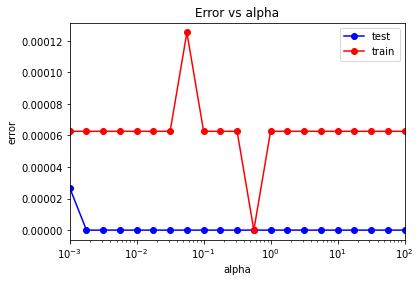

In [39]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Построение графика зависимости точности от alpha:

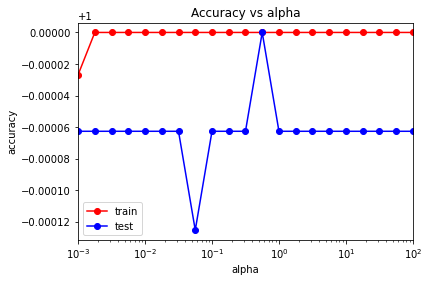

In [40]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
pass

Минимальное значение ошибки и оптимальное значение alpha:

In [41]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.0, 	Min test error: 0.0
Alpha:  0.5623413251903491


Классификатор при найденном значении alpha:

In [42]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


Матрица рассогласования:

In [43]:
print(confusion_matrix(y_test_pred, y_test))

[[2021    0    0    0    0    0    0]
 [   0 2875    0    0    0    0    0]
 [   0    0 2829    0    0    0    0]
 [   0    0    0 3352    0    0    0]
 [   0    0    0    0 2452    0    0]
 [   0    0    0    0    0 1646    0]
 [   0    0    0    0    0    0  781]]


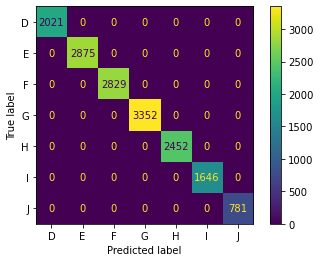

In [44]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

## Подбор числа нейронов в скрытом слое:

In [45]:
neurons_arr = np.arange(10, 150, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Построение графика зависимости ошибки от количества нейронов:

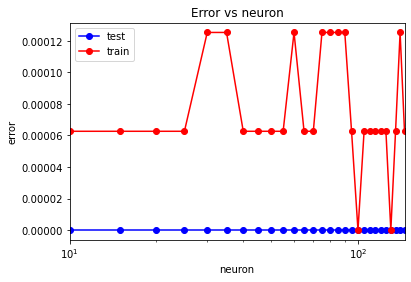

In [46]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

Построение графика зависимости точности от количества нейронов:

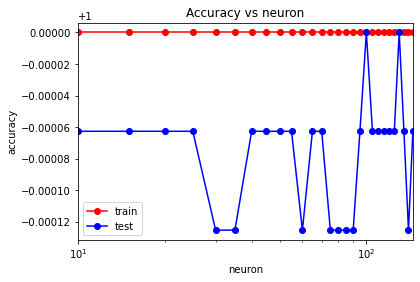

In [47]:
plt.semilogx(neurons_arr, train_acc, 'r-o', label='train')
plt.semilogx(neurons_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Accuracy vs neuron')
plt.xlabel('neuron')
plt.ylabel('accuracy')
plt.legend()
pass

Минимальное значение ошибки и оптимальное число нейронов:

In [48]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
neuron_opt = neurons_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Neuron: ', neuron_opt)

Min train error: 0.0, 	Min test error: 0.0
Neuron:  100


Классификатор при найденном значении нейронов:

In [49]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


## Вывод

Исходя из графика зависимости параметра alpha от точности, можем наблюдать переобучение. При alpha равное оптимальному точность и на тестовой и на обучающей выборке совпадает, то есть получаем оптимальное значение для параметра регуляризации. По графику зависимостей количества нейронов от точности видим, что точность зависит от числа нейронов, при оптимальном значении нейронов = 100 точность на тестовой и обучающей выборках совпадает, в остальных случаях значение точности резко уменьшается. При подборе оптимальных значений гиперпараметров удалось достичь максимальной точности.